In [16]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import pandas as pd

loc = r'D:\OneDrive - TU Eindhoven\Master thesis\Measurements\Calibration\NO2_H2O2 cuvette\data.hdf5'

In [17]:
absorbances = []
timestamps = []
num = []
with h5py.File(loc, 'r') as file:
    for measurement in file.keys():
        measurements = []
        timestamp = []
        for key in file[measurement].keys():
            measurements.append(file[measurement][key][()])
            timestamp.append(file[measurement][key].attrs['timestamp_ms']/1000)
        measurements = np.array(measurements)
        
        wavelength = file[measurement].attrs['wavelength']
        dark = file[measurement].attrs['dark']
        reference = file[measurement].attrs['reference']
        absorbances.append(-np.log10((measurements - dark) / (reference - dark)))
        timestamps.append(np.array(timestamp))
        num.append(measurement)
        

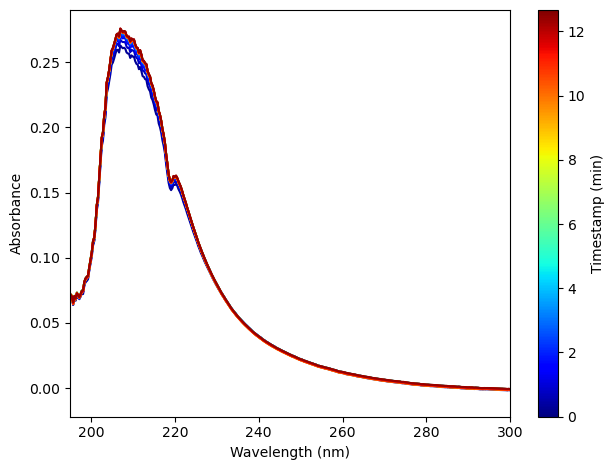

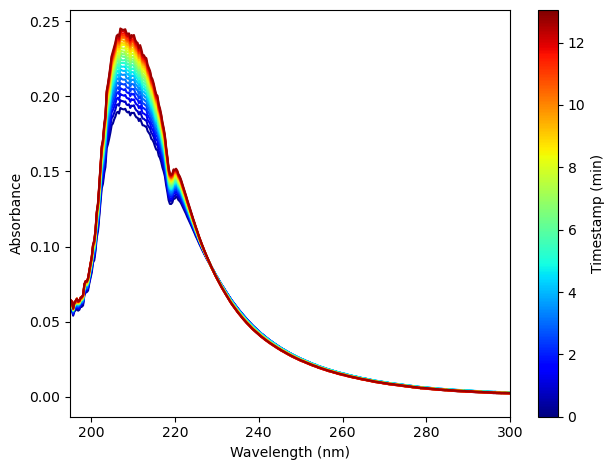

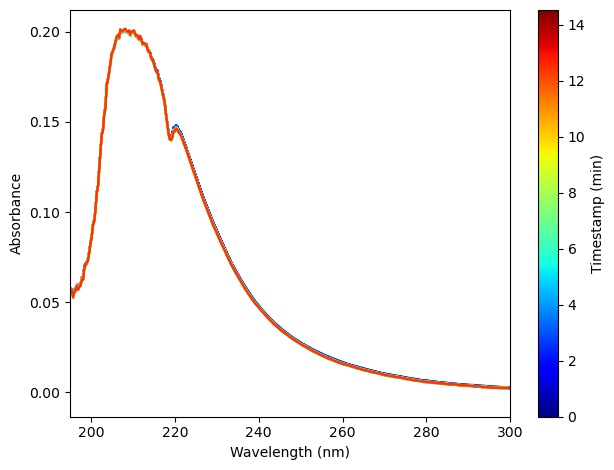

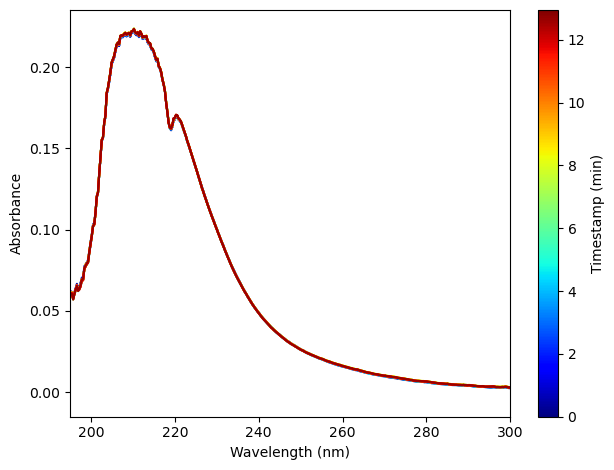

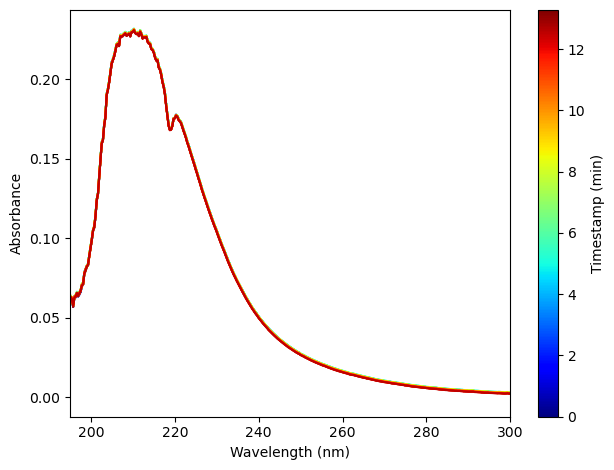

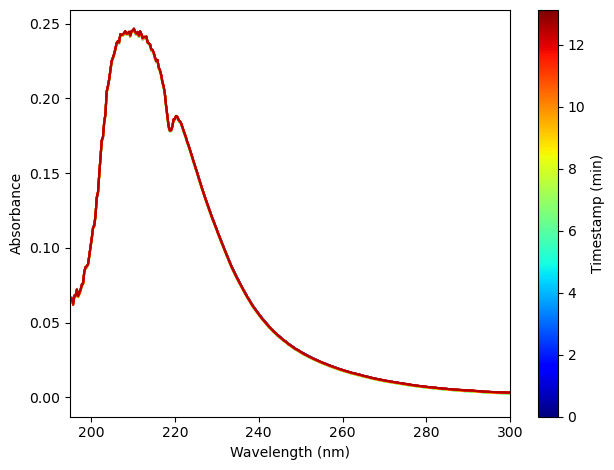

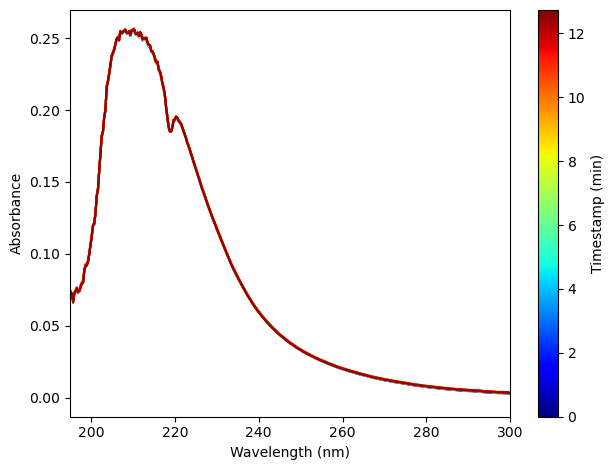

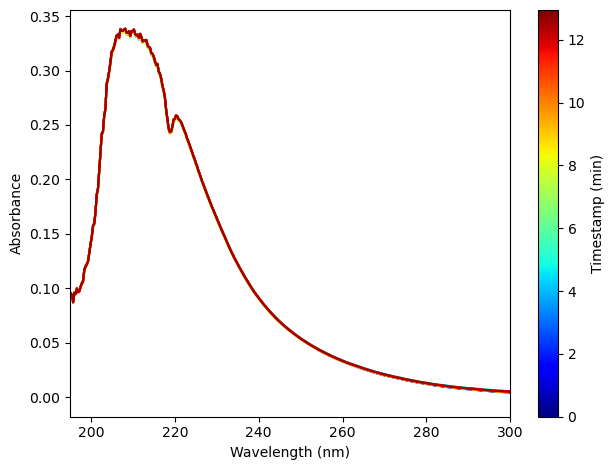

In [19]:
cmap = plt.get_cmap('jet')
every = 250


for index in range(len(absorbances)):
    rel_timestamps = (timestamps[index] - np.min(timestamps[index]))/(np.max(timestamps[index]) - np.min(timestamps[index]))
    
    plt.figure()
    abs = np.add.reduceat(absorbances[index], np.arange(0, len(absorbances[index]), every))[:-1]/every
    color = np.add.reduceat(cmap(rel_timestamps), np.arange(0, len(absorbances[index]), every))[:-1]/every
    
    for a, c in zip(abs, color):
        plt.plot(wavelength, a, color=c)
    # plt.plot(wavelength, absorbances[index][::every].T, color=cmap(rel_timestamps[::every]))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=(timestamps[index][-1]-timestamps[index][0])/60))
    plt.colorbar(sm, label='Timestamp (min)', ax=plt.gca())
    plt.xlim(195, 300)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absorbance')
    plt.tight_layout()
    plt.savefig(rf"C:\Users\drost\Downloads\absorbance_{num[index]}.png")
    plt.show()